Analyse et visuaisation des données 

 ***Analyse des données***

In [56]:
import numpy as np
import pandas as pd

In [125]:
x_train = pd.read_csv('train.csv')
x_predict = pd.read_csv('predict.csv')

In [79]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58881 entries, 0 to 58880
Columns: 129 entries, Product_Info_1 to Response
dtypes: float64(18), int64(107), object(4)
memory usage: 58.0+ MB


Visualisation des differents feautures

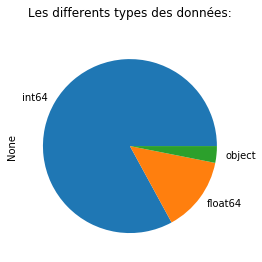

In [112]:
x_train.dtypes.value_counts(normalize=True).plot(kind='pie',title='Les differents types des données:\n')

In [121]:
x_train['Product_Info_2'].value_counts(normalize=True)

D3    0.241164
D4    0.181705
A8    0.115063
D1    0.110562
D2    0.105875
E1    0.044700
A1    0.039656
A6    0.035325
A2    0.033270
A7    0.023369
B2    0.018920
A3    0.016491
A5    0.013060
C3    0.005146
C1    0.004789
C4    0.003702
A4    0.003567
C2    0.002717
B1    0.000917
Name: Product_Info_2, dtype: float64

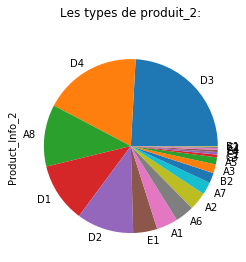

In [132]:

x_train['Product_Info_2'].value_counts(normalize=True).plot(kind='pie',title='Les types de produit_2:\n')

In [130]:

x_train['Product_Info_7'].value_counts(normalize=True)

1    0.978142
3    0.021824
2    0.000034
Name: Product_Info_7, dtype: float64

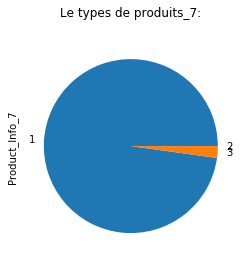

In [131]:
x_train['Product_Info_7'].value_counts(normalize=True).plot(kind='pie',title='Le types de produits_7:\n')

In [118]:
x_train['Response'].value_counts(normalize=True)

8    0.328238
6    0.189127
7    0.134950
2    0.110307
1    0.104584
5    0.091541
4    0.024116
3    0.017136
Name: Response, dtype: float64

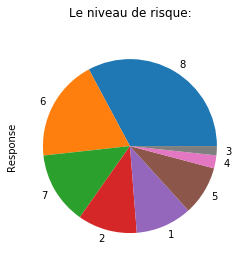

In [115]:
x_train['Response'].value_counts(normalize=True).plot(kind='pie',title='Le niveau de risque:\n')

In [128]:
x_train['InsuredInfo_7'].value_counts(normalize=True)

Male      0.575279
Female    0.424721
Name: InsuredInfo_7, dtype: float64

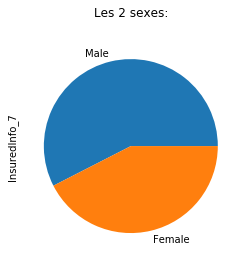

In [119]:
x_train['InsuredInfo_7'].value_counts(normalize=True).plot(kind='pie',title='Les 2 sexes:\n')

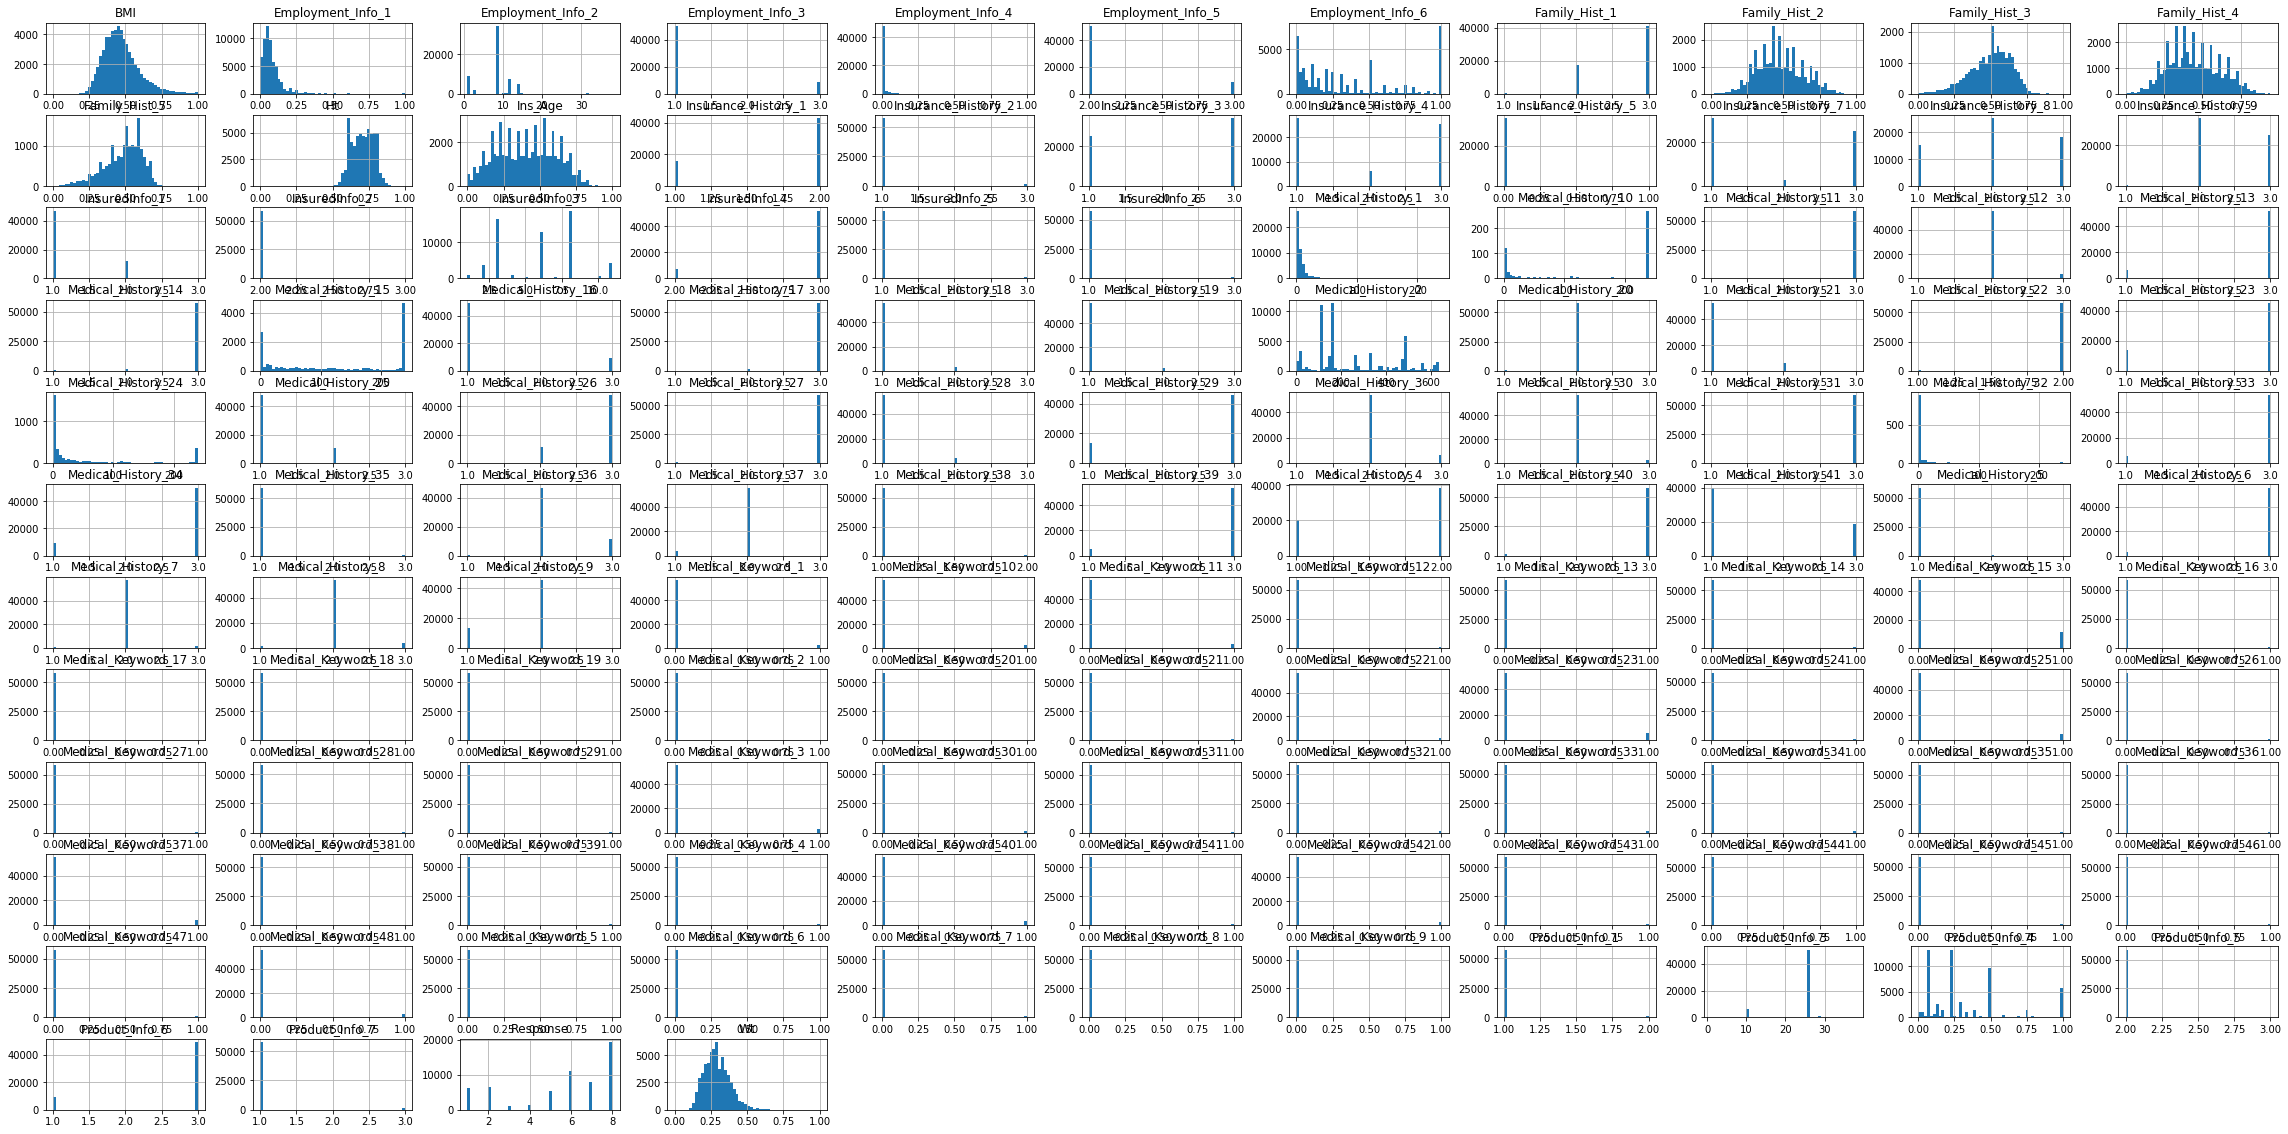

In [59]:
# Visualisez la distribution des données des différentes caractères
import matplotlib.pyplot as plt
x_train.hist(bins=50, figsize=(40,20))
plt.show()


La variance pour les caractéristiques numériques

In [173]:
tabel_var = x_train[x_train.columns].var().sort_values(ascending=True)
tabel_var.head(20)


Insurance_History_5    0.000054
Employment_Info_4      0.001083
Medical_History_35     0.004106
Medical_History_38     0.004817
Ht                     0.005513
Medical_Keyword_13     0.005892
Medical_Keyword_9      0.006580
Employment_Info_1      0.006803
Medical_Keyword_38     0.006814
Medical_Keyword_35     0.006898
Product_Info_5         0.006898
InsuredInfo_2          0.007400
Medical_History_5      0.007401
Medical_Keyword_18     0.007417
Medical_Keyword_44     0.007467
Medical_Keyword_14     0.007785
Wt                     0.007923
Medical_Keyword_20     0.008019
Medical_Keyword_46     0.008403
Medical_Keyword_5      0.008537
dtype: float64

In [170]:
from pandas import Series, DataFrame
data = {'variable': ['Insurance_History_5', 'Employment_Info_4', 'Medical_History_35 ', 'Medical_History_38', 'Ht','Medical_Keyword_13','Medical_Keyword_9','Employment_Info_1','Medical_Keyword_38','Product_Info_5 ','Medical_Keyword_35','InsuredInfo_2 ','Medical_History_5 ','Medical_Keyword_18 ','Medical_Keyword_44','Medical_Keyword_14','Wt ','Medical_Keyword_20','Medical_Keyword_46','Medical_Keyword_5 '],
        'variance':  [  0.000054,   0.001083,  0.004106, 0.004817,    0.005513, 0.005892, 0.006580, 0.006803, 0.006814, 0.006898, 0.006898, 0.007400, 0.007401, 0.007417, 0.007467, 0.007785, 0.007923, 0.008019, 0.008403, 0.008537]
       }
frame = DataFrame(data)


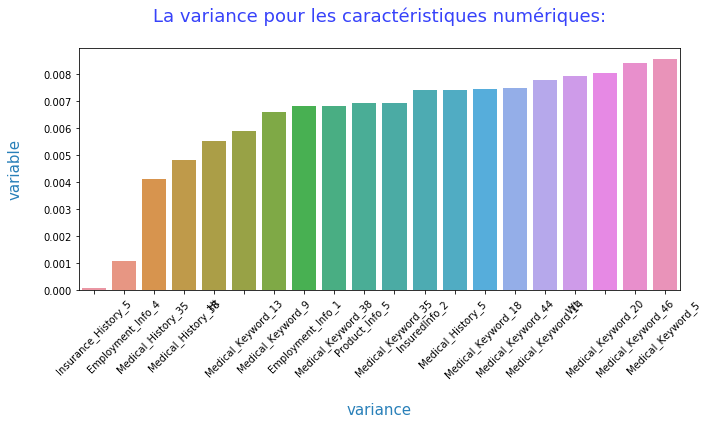

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=frame['variable'], y=frame['variance'])
plt.xlabel('\nvariance', fontsize=15, color='#2980b9')
plt.ylabel('variable\n', fontsize=15, color='#2980b9')
plt.title("La variance pour les caractéristiques numériques:\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()



***D'apres la table de variance et le diagramme de distribution, nous pouvons voir qu'il existe de nombreuses caractères avec une faible variance, les valeurs de ces caractères sont presque fixes, ce qui n'a aucun sens, nous pouvons supprimer certaines parmi eux.***

In [41]:
# Separation des labels
y_train = x_train['Response']

del x_train['Response']



In [85]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    # Comptez le nombre de valeurs manquantes dans chaque colonne
    summary['Missing'] = df.isnull().sum().values    
    # Comptez le nombre de valeurs différentes dans chaque colonne, à l'exclusion des valeurs nulles
    summary['Uniques'] = df.nunique().values
    return summary

In [87]:
des_train = description(x_train)
print(des_train)

                    Name   dtypes  Missing  Uniques
0         Product_Info_1    int64        0        2
1         Product_Info_2   object        0       19
2         Product_Info_3    int64        0       34
3         Product_Info_4  float64        0     1482
4         Product_Info_5    int64        0        2
5         Product_Info_6    int64        0        2
6         Product_Info_7    int64        0        3
7                Ins_Age  float64        0       65
8                     Ht  float64        0       39
9                     Wt  float64        0      300
10                   BMI  float64        0     3247
11     Employment_Info_1  float64       19     1931
12     Employment_Info_2    int64        0       36
13     Employment_Info_3    int64        0        2
14     Employment_Info_4  float64     6717      869
15     Employment_Info_5    int64        0        2
16     Employment_Info_6  float64    10753      985
17         InsuredInfo_1    int64        0        3
18         I

In [89]:
print('Trainning set:')
print('- There are ',len(des_train['Missing'].unique())-1,' features with missing values;')
print('- There are ',(des_train['dtypes']=='object').sum(),' object-type features;')
print('- There are ',(des_train['dtypes']=='float64').sum(),' float-type features')
print('Name - Missing/Nb_row:')
des_train['Missing'] = des_train['Missing']/x_train.shape[0]
print(des_train[des_train['Missing']!=0].sort_values(by=['Missing'],ascending=False)[['Name','Missing']])

Trainning set:
- There are  15  features with missing values;
- There are  4  object-type features;
- There are  18  float-type features
Name - Missing/Nb_row:
                   Name   Missing
48   Medical_History_10  0.990642
70   Medical_History_32  0.981318
62   Medical_History_24  0.935939
24        InsuredInfo_8  0.879197
53   Medical_History_15  0.750972
25        InsuredInfo_9  0.749410
38        Family_Hist_5  0.703996
36        Family_Hist_3  0.576621
35        Family_Hist_2  0.482702
30  Insurance_History_5  0.427642
37        Family_Hist_4  0.323177
16    Employment_Info_6  0.182623
39    Medical_History_1  0.149607
14    Employment_Info_4  0.114078
11    Employment_Info_1  0.000323


In [105]:
from pandas import Series, DataFrame
data = {'Name': ['Insurance_History_10', 'Employment_Info_32', 'Medical_History_24 ','InsuredInfo_8' 'Medical_History_15', 'InsuredInfo_9','Family_History_5 ','Family_Hist_3','Family_Hist_2','Insurance_History_5','Family_Hist_4','Employment_Info_6','Medical_History_1','Employment_Info_4','Employment_Info_1'],
        'Missing%': [0.990642, 0.981318, 0.935939,0.879197, 0.750972, 0.749410, 0.703996, 0.576621,0.482702, 0.427642, 0.323177, 0.182623, 0.149607, 0.114078, 0.000323]
       }
frame = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })
frame

,Name,Missing%
0,Insurance_History_10,0.990642
1,Employment_Info_32,0.981318
2,Medical_History_24,0.935939
3,InsuredInfo_8Medical_History_15,0.879197
4,InsuredInfo_9,0.750972
5,Family_History_5,0.749410
6,Family_Hist_3,0.703996
7,Family_Hist_2,0.576621
8,Insurance_History_5,0.482702
9,Family_Hist_4,0.427642


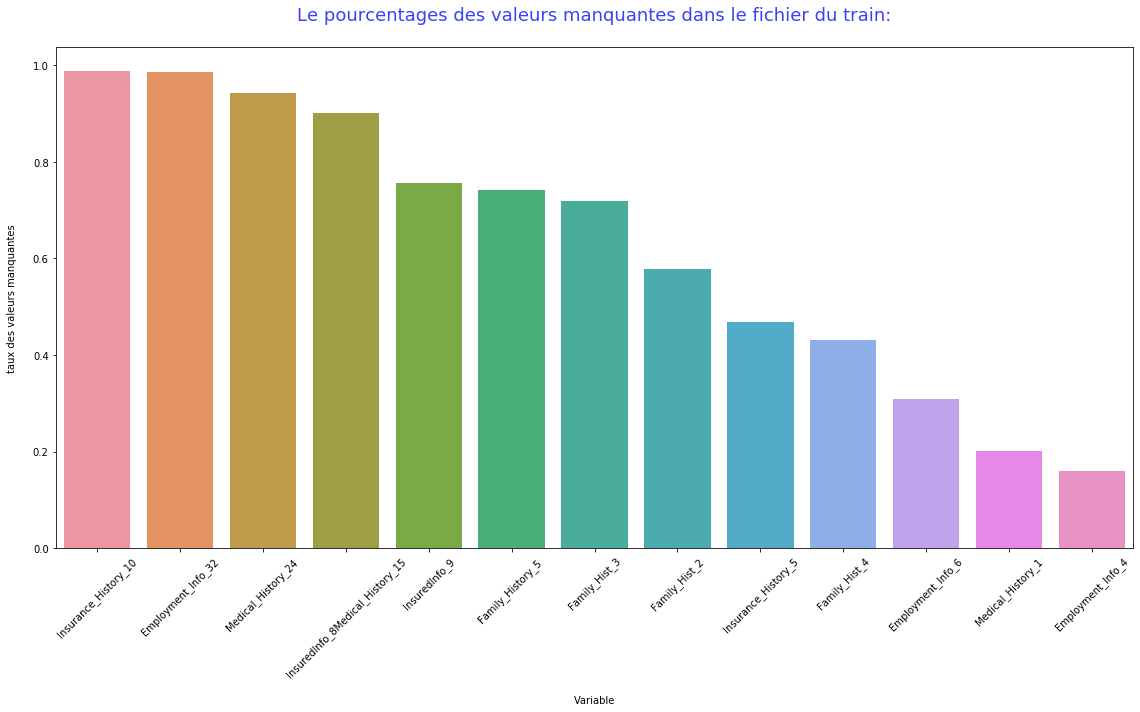

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.figure(figsize=(16,10))
sns.barplot(x=frame['Name'], y=frame['Missing%'])
plt.xlabel('\nVariable')
plt.ylabel('taux des valeurs manquantes\n')
plt.title("Le pourcentages des valeurs manquantes dans le fichier du train:\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()



In [109]:
des_predict = description(_predict)
print(des_predict)

                    Name   dtypes  Missing  Uniques
0         Product_Info_1    int64        0        2
1         Product_Info_2   object        0       16
2         Product_Info_3    int64        0        8
3         Product_Info_4  float64        0       41
4         Product_Info_5    int64        0        2
5         Product_Info_6    int64        0        2
6         Product_Info_7    int64        0        2
7                Ins_Age  float64        0       58
8                     Ht  float64        0       21
9                     Wt  float64        0      130
10                   BMI  float64        0      376
11     Employment_Info_1  float64        0      126
12     Employment_Info_2    int64        0       12
13     Employment_Info_3    int64        0        2
14     Employment_Info_4  float64       62       38
15     Employment_Info_5    int64        0        2
16     Employment_Info_6  float64      101       81
17         InsuredInfo_1    int64        0        3
18         I

In [111]:
print('Predict set:')
print('- There are ',len(des_predict['Missing'].unique())-1,' features with missing values')
print('- For each feature, there are ',des_predict['Missing'].unique()[1:],' values are missing;')
print('Name - Missing/Nb_row:')
des_predict['Missing'] = des_predict['Missing']/x_predict.shape[0]
print(des_predict[des_predict['Missing']!=0].sort_values(by=['Missing'],ascending=False)[['Name','Missing']])

Predict set:
- There are  14  features with missing values
- For each feature, there are  [ 62 101 451 371 216 234 289 155 359  80 494 378 471 493]  values are missing;
Name - Missing/Nb_row:
                   Name  Missing
48   Medical_History_10    0.988
70   Medical_History_32    0.986
62   Medical_History_24    0.942
24        InsuredInfo_8    0.902
53   Medical_History_15    0.756
25        InsuredInfo_9    0.742
38        Family_Hist_5    0.718
36        Family_Hist_3    0.578
35        Family_Hist_2    0.468
30  Insurance_History_5    0.432
37        Family_Hist_4    0.310
16    Employment_Info_6    0.202
39    Medical_History_1    0.160
14    Employment_Info_4    0.124


In [133]:
from pandas import Series, DataFrame
data = {'Name': ['Insurance_History_10', 'Employment_Info_32', 'Medical_History_24 ','InsuredInfo_8' 'Medical_History_15', 'InsuredInfo_9','Family_History_5 ','Family_Hist_3','Family_Hist_2','Insurance_History_5','Family_Hist_4','Employment_Info_6','Medical_History_1','Employment_Info_4'],
        'Missing%': [0.988, 0.986,0.942, 0.902, 0.756, 0.742, 0.718,0.578, 0.468, 0.432, 0.310, 0.202, 0.160, 0.124]
       }
frame = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })
frame

,Name,Missing%
0,Insurance_History_10,0.988
1,Employment_Info_32,0.986
2,Medical_History_24,0.942
3,InsuredInfo_8Medical_History_15,0.902
4,InsuredInfo_9,0.756
5,Family_History_5,0.742
6,Family_Hist_3,0.718
7,Family_Hist_2,0.578
8,Insurance_History_5,0.468
9,Family_Hist_4,0.432


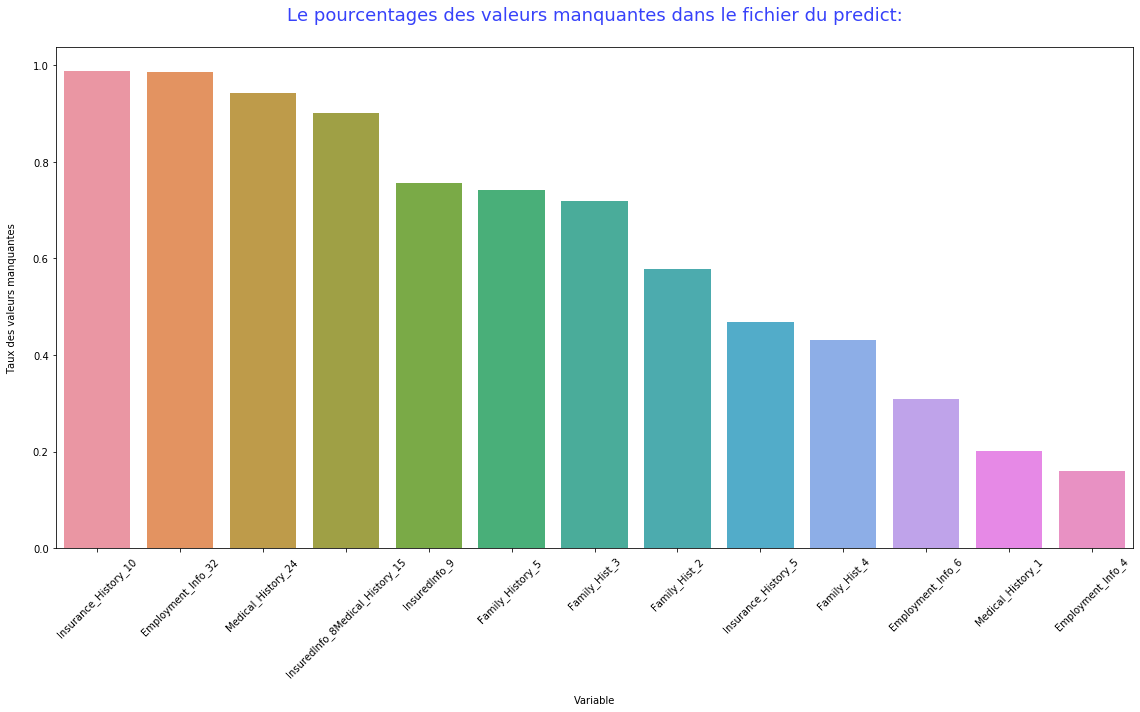

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.figure(figsize=(16,10))
sns.barplot(x=frame['Name'], y=frame['Missing%'])
plt.xlabel('\nVariable')
plt.ylabel('Taux des valeurs manquantes\n')
plt.title("Le pourcentages des valeurs manquantes dans le fichier du predict:\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

La correlation entre la variable cible(response) et les autres variables:

In [175]:
x_temp = x_train
x_temp['Response'] = y_train
x_temp = x_temp.corr()
tabel_corr2 = abs(x_temp[['Response']]).sort_values(by=['Response'],ascending=False)
del x_temp



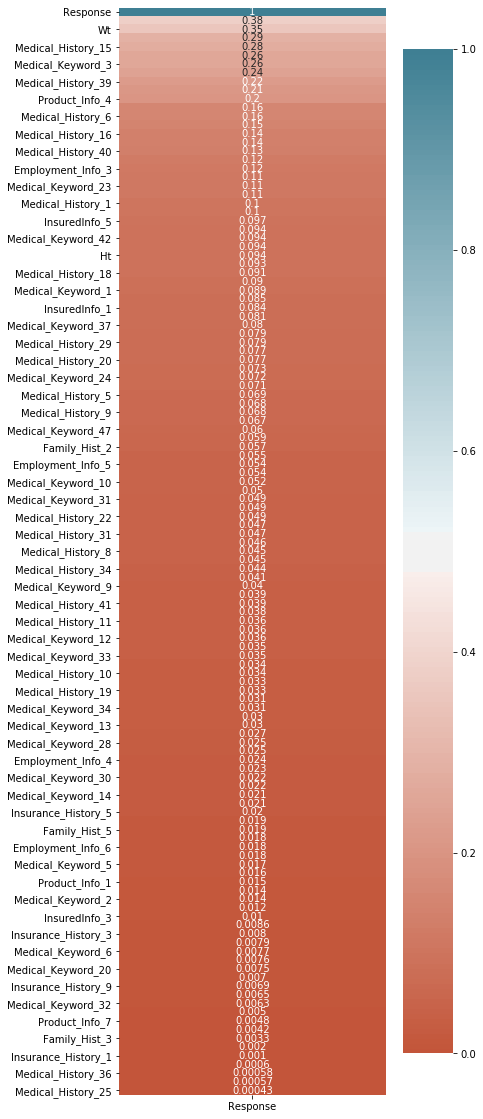

In [176]:
import seaborn as sns
plt.figure(figsize=(6,20))
sns.heatmap(tabel_corr2,
            vmin=0,
            cmap = sns.diverging_palette(20, 220, n=200),
            annot=True)
plt.show()


La corrélation entre la variable cible et les 10 valeurs les moins corrélés avec elle: 


In [168]:
correlation=tabel_corr2[-10:]
correlation

,Response
Medical_Keyword_45,0.004952
Product_Info_7,0.004825
Medical_Keyword_8,0.004202
Family_Hist_3,0.003265
Product_Info_5,0.002011
Insurance_History_1,0.001034
Medical_History_26,0.000601
Medical_History_36,0.000580
Insurance_History_4,0.000567
Medical_History_25,0.000428


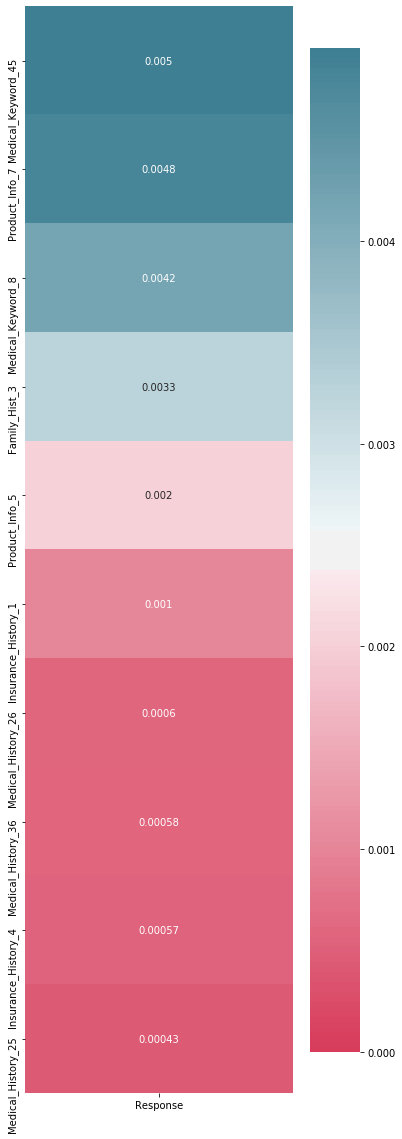

In [169]:
import seaborn as sns
plt.figure(figsize=(6,20))
sns.heatmap(correlation,
            vmin=0, 
            cmap = sns.diverging_palette(5, 220, n=200),
            annot=True)
plt.show()

La corrélation entre la variable cible et les 10 valeurs les plus corrélés avec elle: 


In [158]:

correlation=tabel_corr2[:10]
correlation

,Response
Response,1.000000
BMI,0.381367
Wt,0.351277
Medical_History_23,0.286704
Medical_History_15,0.276576
Medical_Keyword_15,0.259646
Medical_Keyword_3,0.257656
Medical_History_4,0.240194
Medical_History_39,0.220183
Ins_Age,0.209668


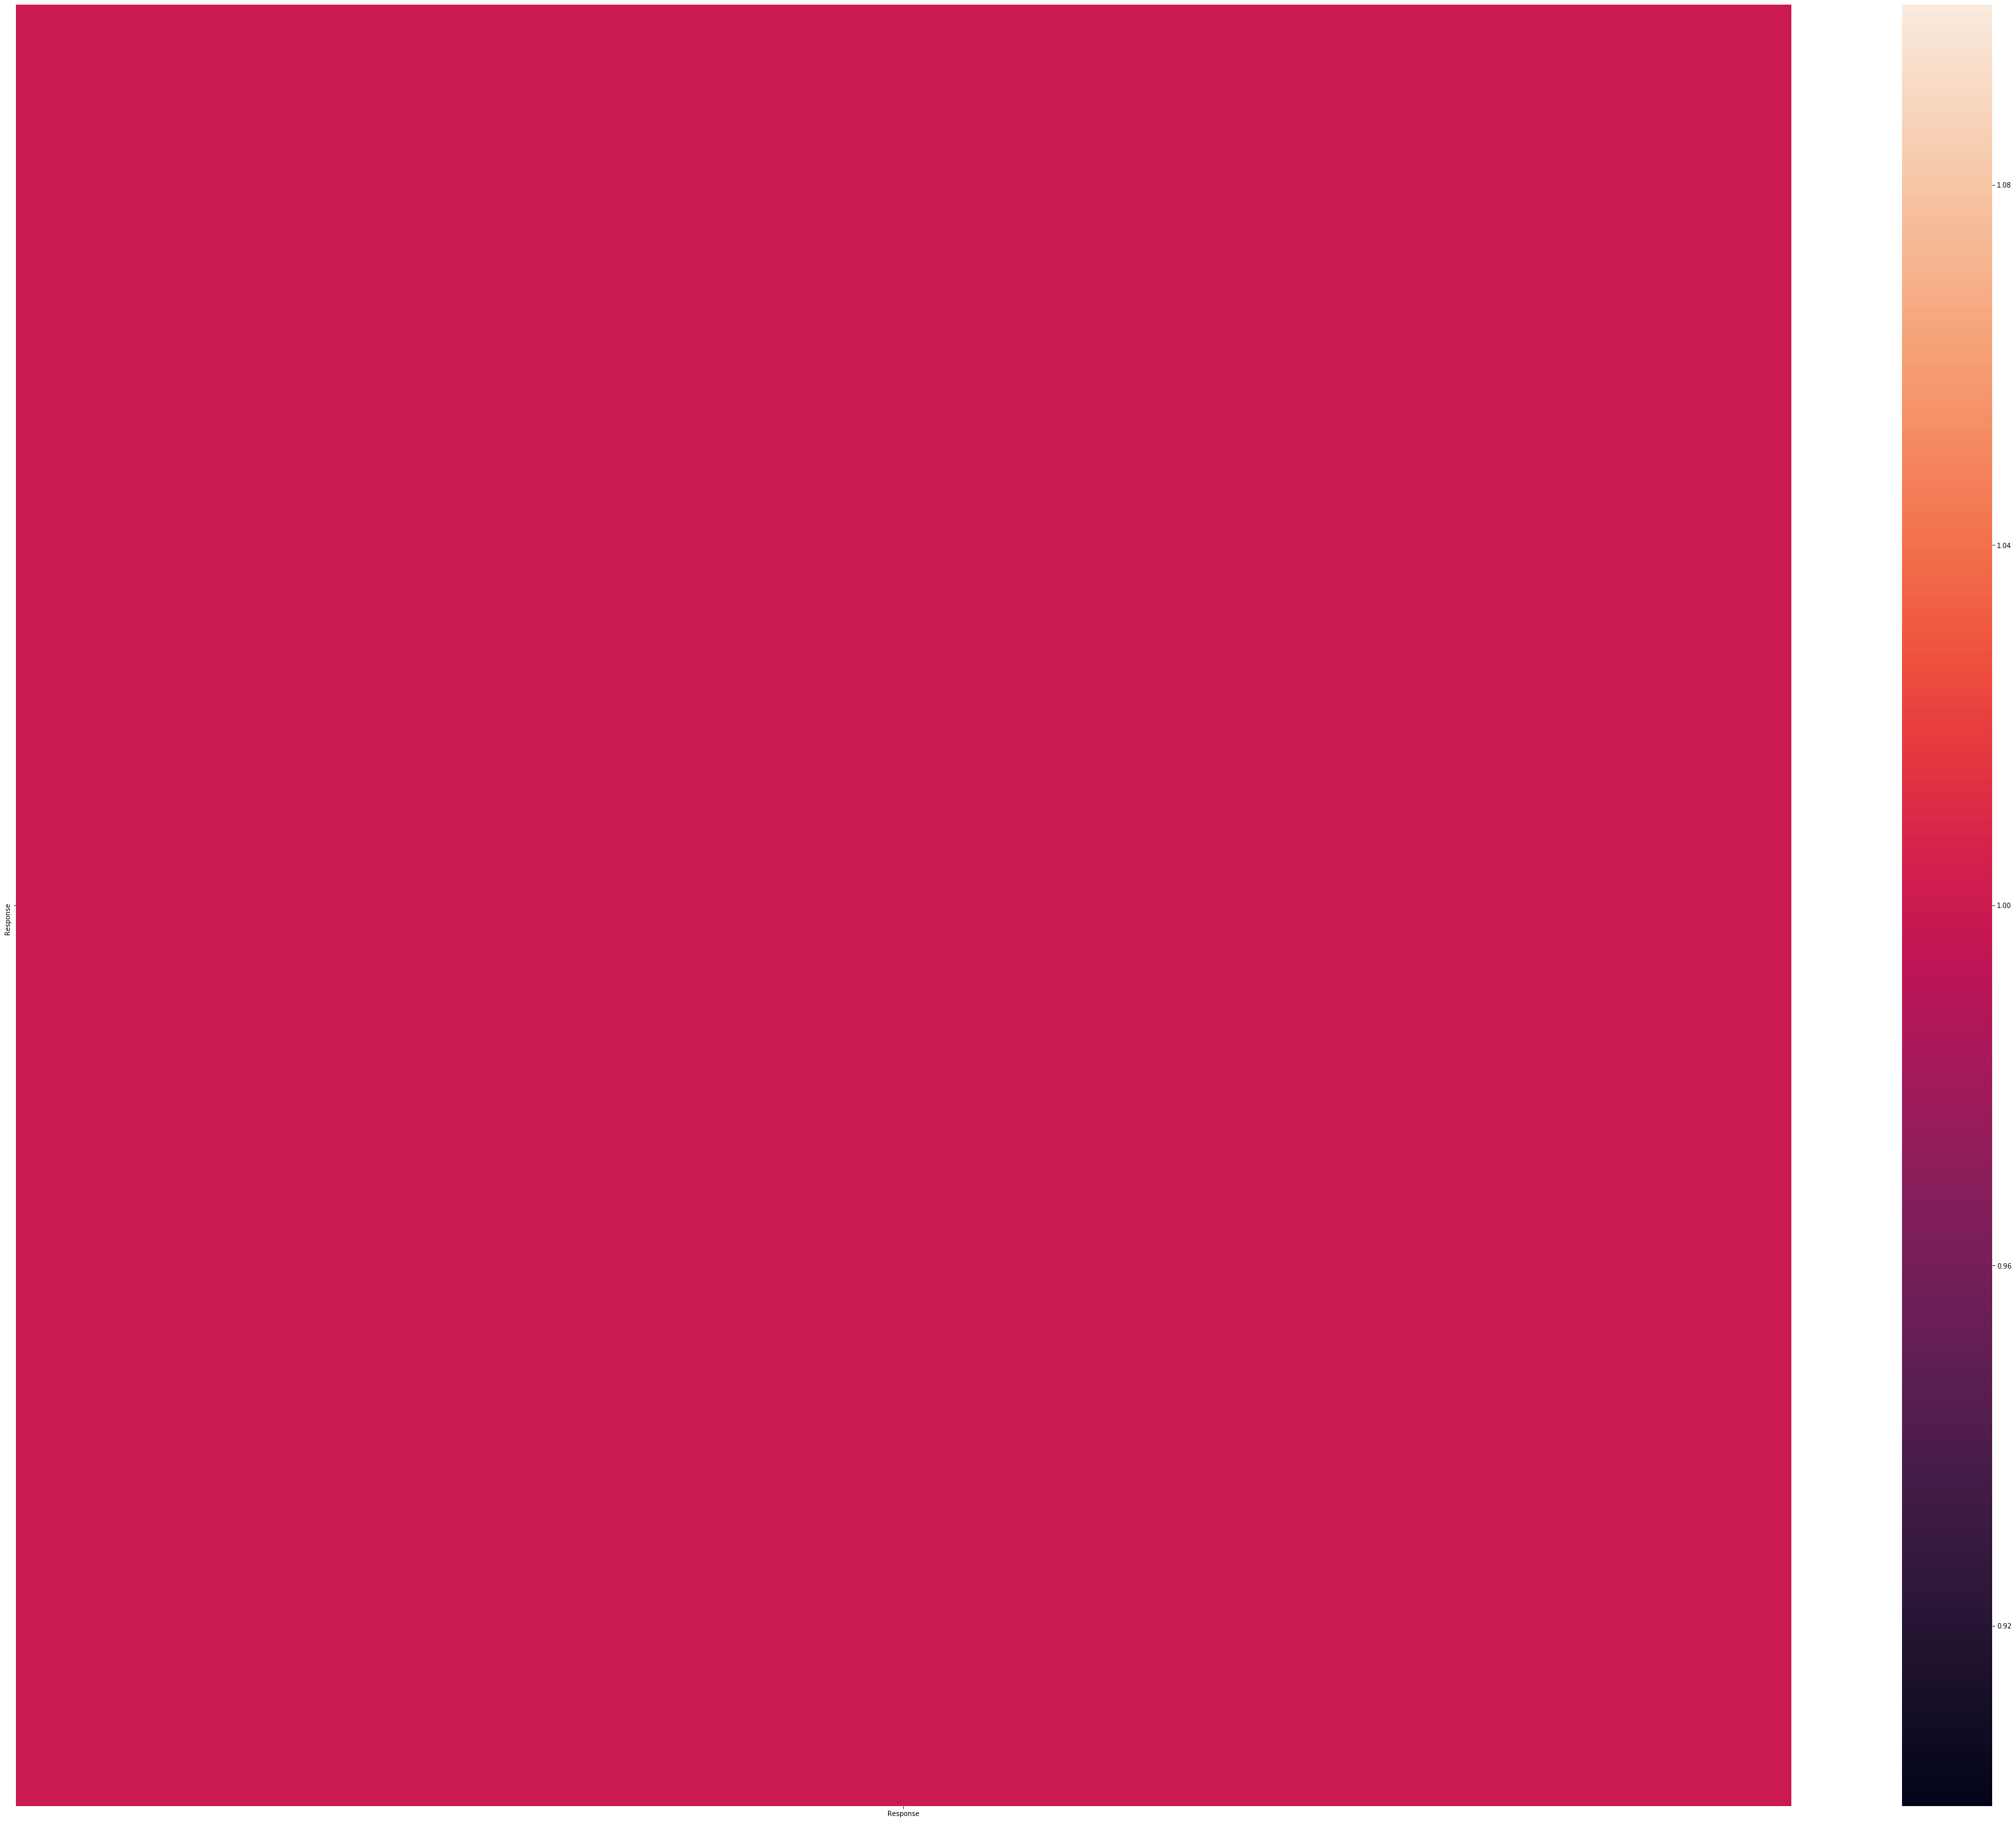

In [161]:
sns.heatmap(correlation.corr())

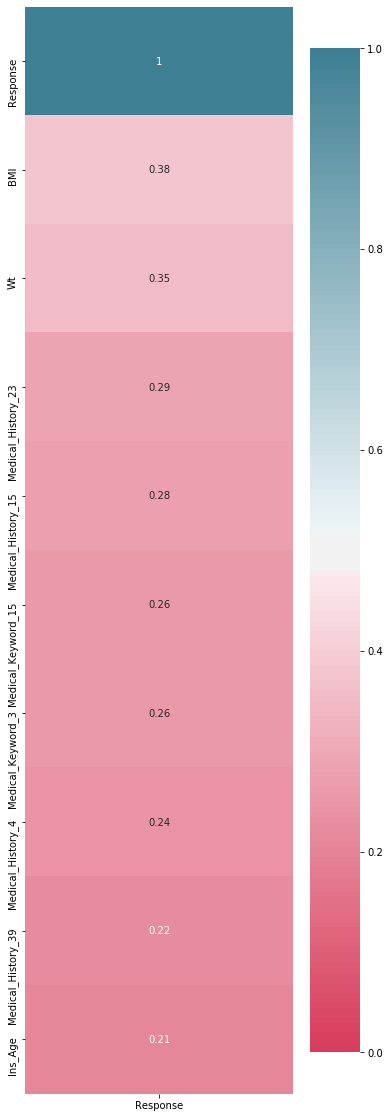

In [167]:
import seaborn as sns
plt.figure(figsize=(6,20))
sns.heatmap(correlation,
            vmin=0, 
            cmap = sns.diverging_palette(5, 220, n=200),
            annot=True)
plt.show()

[]

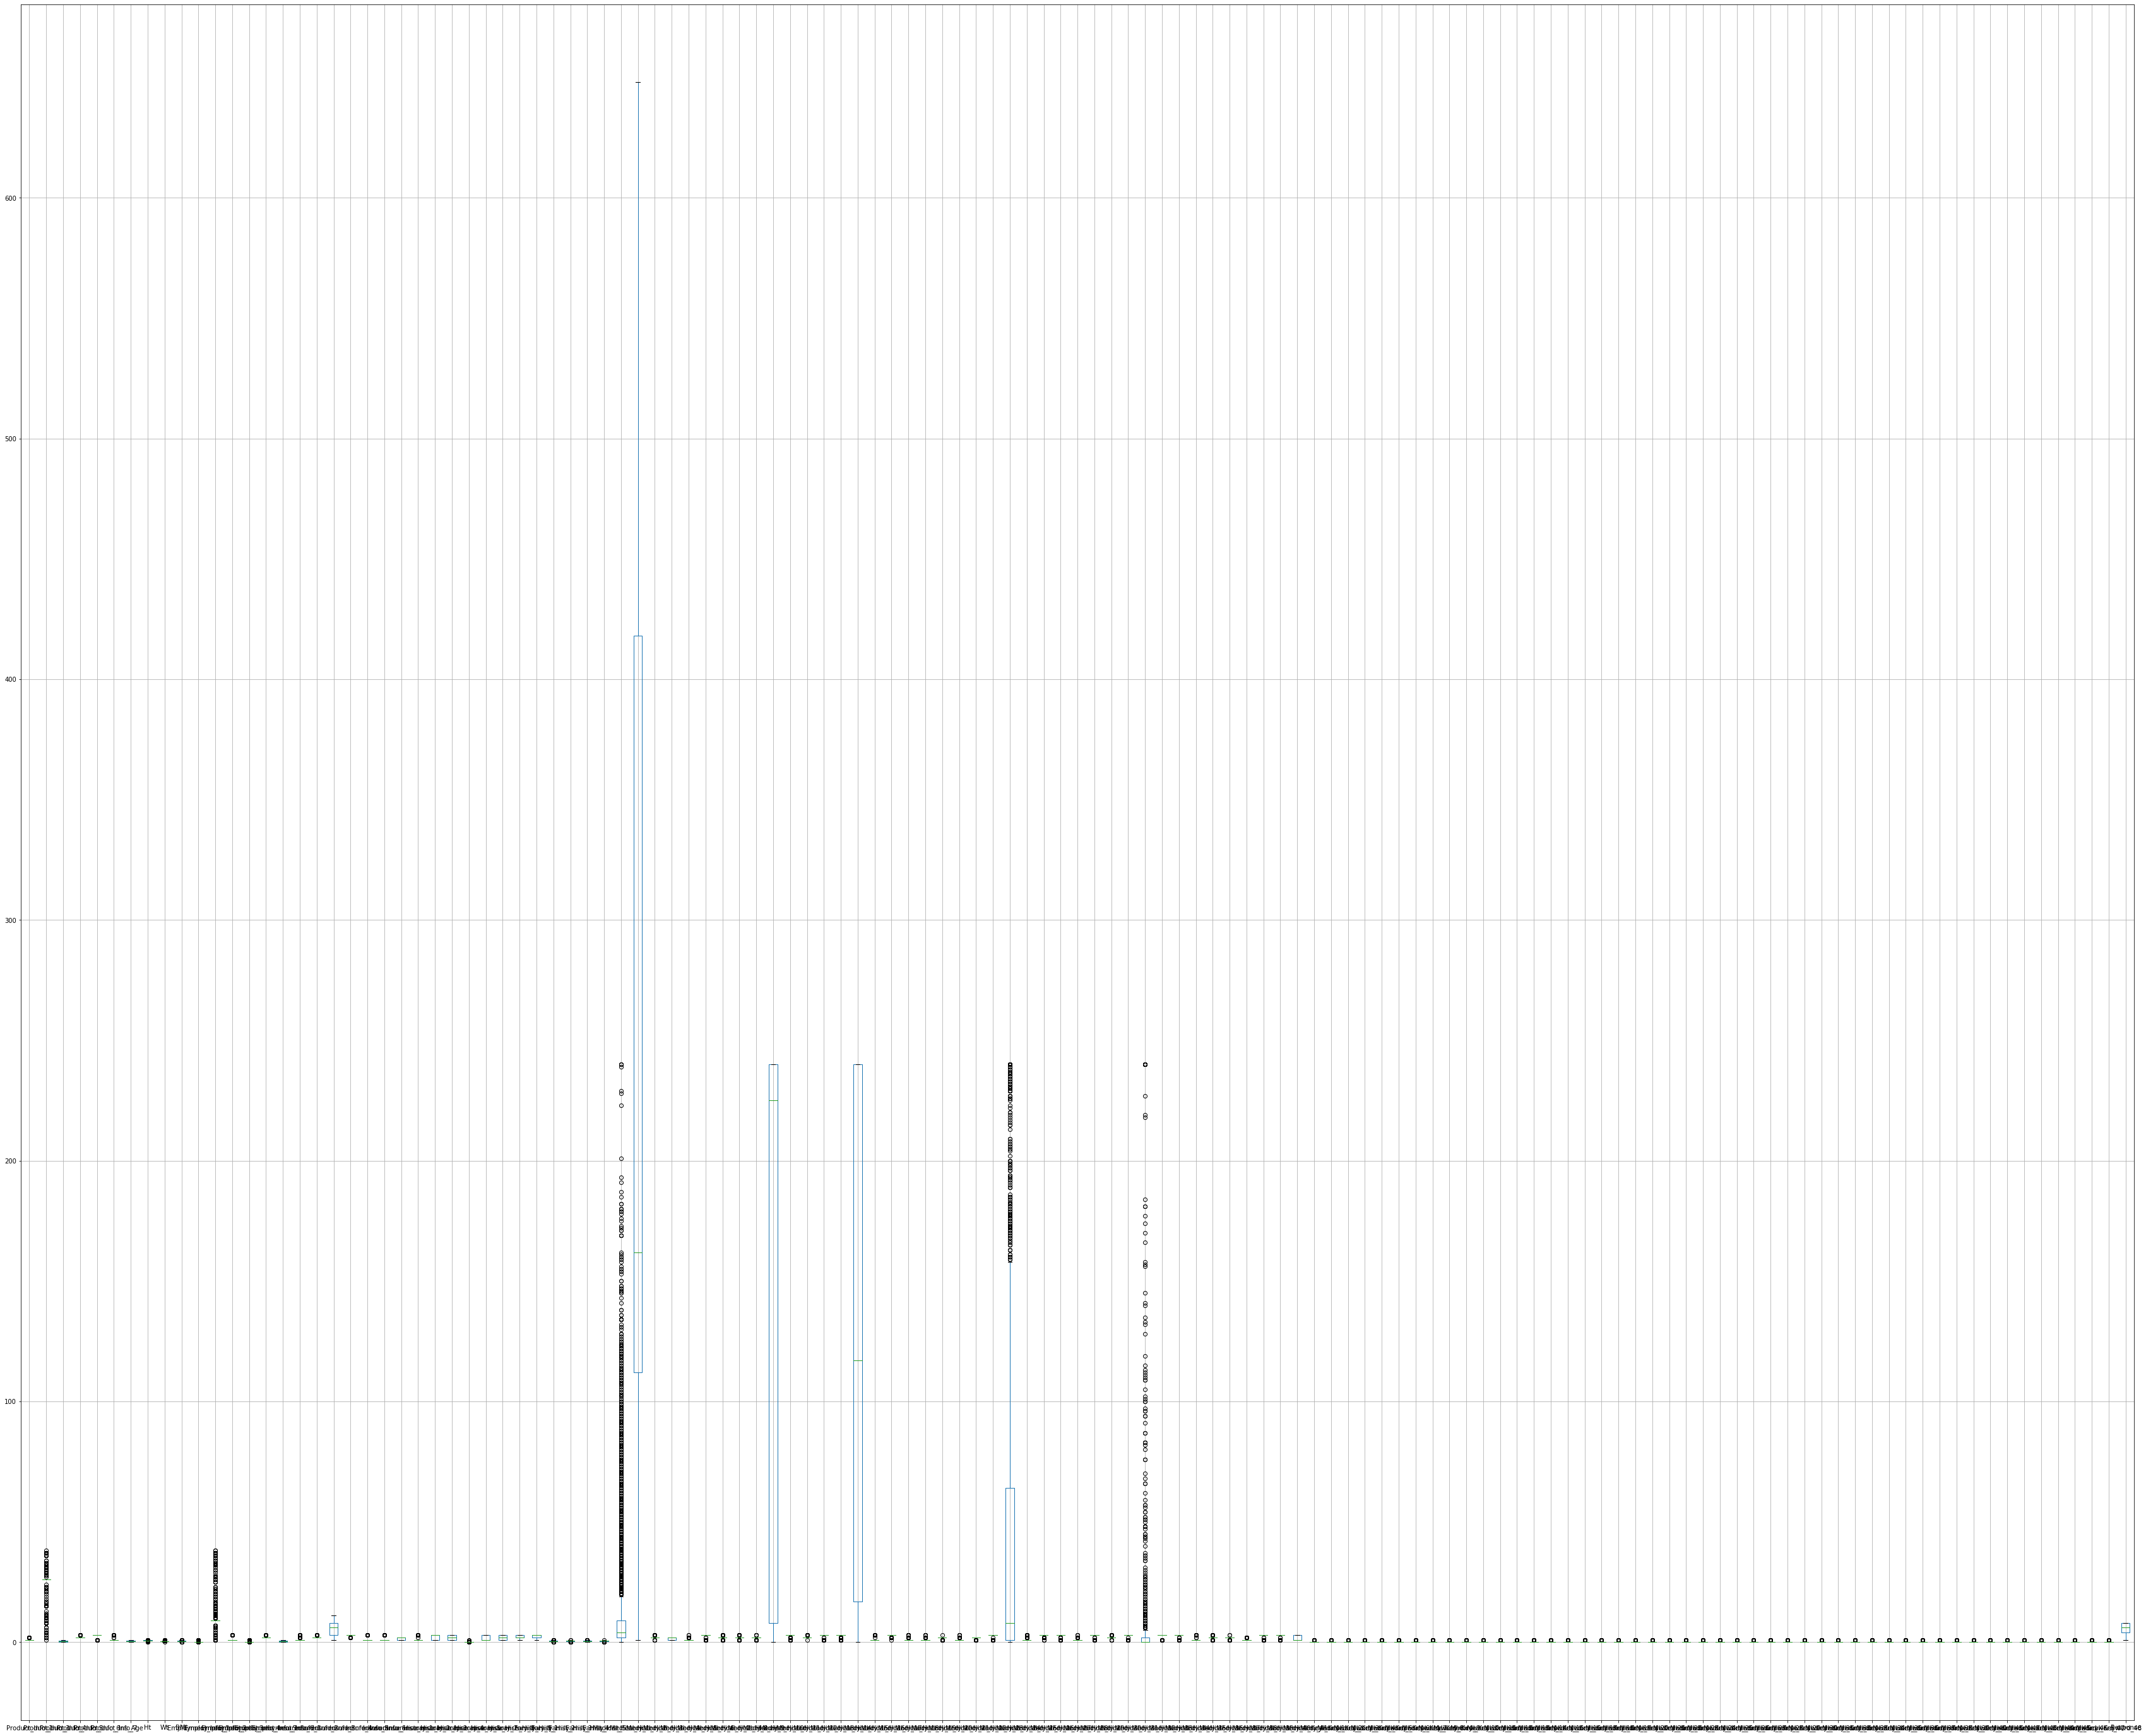

In [142]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 60,50
x_train.boxplot(return_type ='dict')
plt.plot()

*** MISSING VALUE***

Avec les données de train 

In [28]:
#Supprimer les colonnes non prises en compte pour la suite
x_train= x_train.drop(columns =['Medical_History_10','Medical_History_32','Medical_History_24','InsuredInfo_8','Medical_History_15','InsuredInfo_9','Family_Hist_5','Family_Hist_3','Product_Info_2','InsuredInfo_7','InsuredInfo_8','InsuredInfo_9'])

In [29]:
x_train.isnull().sum().values 

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,    19,     0,     0,  6717,     0, 10753,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, 25180,
           0,     0,     0,     0, 28422, 19029,  8809,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int64)

In [30]:
print(x_train.shape)

(58881, 118)


In [31]:
# pour les Missing value , on remplace les nan repalce NaN avec differents methodes:
#Imputation of missing value Using (Mean/Median) Values:
x_train.fillna(x_train.mean(),inplace=True)
x_train=pd.DataFrame(x_train)

In [8]:
#Imputation of missing value using ffill:
x_train.fillna(method='bfill',inplace=True)
x_train=pd.DataFrame(x_train)

In [32]:
x_train.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,...,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000
mean,1.026426,24.414956,0.328874,2.006946,2.673545,1.043681,0.405636,0.707294,0.292587,0.469455,...,0.013689,0.056979,0.010020,0.045482,0.010649,0.007524,0.013740,0.008475,0.019956,0.054568
std,0.160400,5.073111,0.282548,0.083055,0.739153,0.292271,0.197211,0.074246,0.089009,0.122168,...,0.116196,0.231805,0.099599,0.208360,0.102642,0.086413,0.116409,0.091668,0.139849,0.227136
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
print(x_train.isnull().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


Avec les données de prediction

In [34]:
#on fait la meme chose avec les donnees du predict
#Supprimer les colonnes non prises en compte pour la suite(on plus de 50% en taux de valeurs manquantes)
x_predict= x_predict.drop(columns =['Medical_History_10','Medical_History_32','Medical_History_24','InsuredInfo_8','Medical_History_15','InsuredInfo_9','Family_Hist_5','Family_Hist_3','Product_Info_2','InsuredInfo_7','InsuredInfo_8','InsuredInfo_9'])

In [35]:
# Supprission des memes feature 
print(x_predict.shape)


(500, 118)


In [36]:
# pour les Missing value , on remplace les nan repalce NaN avec differents methodes:
#Imputation of missing value Using (Mean/Median) Values:
x_predict.fillna(x_predict.mean(),inplace=True)
x_predict=pd.DataFrame(x_predict)


In [ ]:
#Imputation of missing value using ffill:
x_predict.fillna(method='bfill',inplace=True)
x_predict=pd.DataFrame(x_predict)

In [37]:
print(x_predict.isnull().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
